In [ ]:
2-Layer Neural Network
Logistic Regression Classification'ın iki kez gerçekleşmesidir. En az bir tane hidden layer içerir. Hidden Layer ve 
output layer olmak üzere 2-layer Neural Network yapısını içermektedir.
Çalışmada 64*64 piksel bilgisine sahip Sign Language Digit Dataset görüntülerinin 3 node bulunduran bir hidden layer ile 
sınıflandırılması içermektedir.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

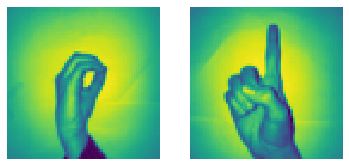

In [21]:
X_l= np.load('X.npy')
Y_l = np.load('Y.npy')
img_size= 64
plt.subplot(1,2,1)
plt.imshow(X_l[300].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X_l[900].reshape(img_size,img_size))
plt.axis('off')


X.npy'de bulunan görüntülerimiz ve Y.npy'de bulunan labellerimiz load edildi.
Data hakkında fikir sahibi olmak için  subplot ile görselleştirme yapıldı. Görselleştirme işleminde X_l ve Y_l nin 300 ve 900 indeksleri tercih edildi.
Çünkü bu çalışmada 0 ve 1 için sınıflandırma yapılmaktadır.


In [22]:
X = np.concatenate((X_l[204:409],X_l[822:1027]),axis=0)
z=np.zeros(205)
o=np.ones(205)
Y = np.concatenate((z,o),axis=0).reshape(X.shape[0],1)
print("X shape : ",X.shape)
print("Y shape  :",Y.shape)


X shape :  (410, 64, 64)
Y shape  : (410, 1)


İlk olarak load edilen data setimizde yalnızca 0 ve 1 görüntülerini almak için 204:409 ve 822:1027 sample değerleri alınmış
(X.npy'da 0 ve 1 görüntülerenin bulunduğu indeks aralığı) ve concatenate işlemi yapılmıştır.
Ardından label değerleri için 0 ve 1 lerden oluşan Y array oluşturulmuştur.
Burada X shape'in üç boyut olduğuna dikkat ediniz.

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]


Data train ve test olmak üzere ayırılmıştır.

In [25]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten :", X_train_flatten.shape)
print("X test flatten  : ", X_test_flatten.shape)




X train flatten : (348, 4096)
X test flatten  :  (62, 4096)


Üç boyutta bulunan X ve Y iki boyuta indirilmiştir.

In [26]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("X train shape",x_train.shape)
print("X test shape", x_test.shape)
print("Y train shape", y_train.shape)
print("Y test shape",y_test.shape)



X train shape (4096, 348)
X test shape (4096, 62)
Y train shape (1, 348)
Y test shape (1, 62)


Transpozu alma işlemi gerçekleştirildi. Bu durumda bir ANN yapısına uygun olunacak şekilde, feature dediğimiz piksel 
piksel değerlerimiz ve farklı görüntülerimiz ön işlemler yardımı ile hazırlandı.

In [27]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


İleri beselme için aktivasyon fonksiyonumuz olan ve türevlenebilen sigmoid function yazıldı.
Sigmoid funtion: 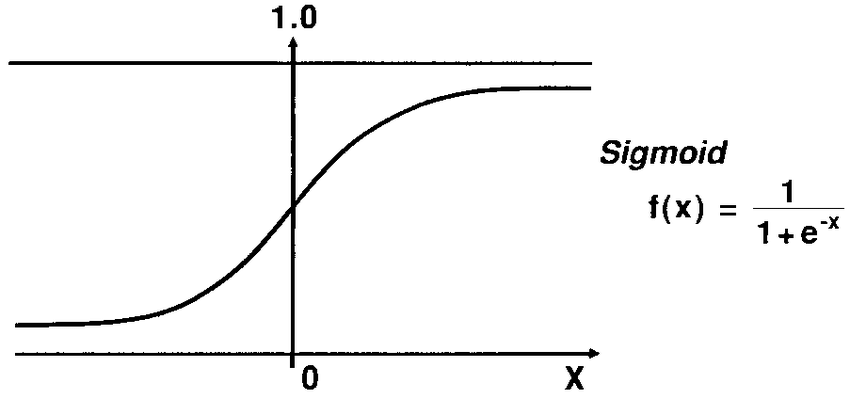

![](img/sigmoid.png)

In [28]:
def initialize_parameters_and_layer_size_NN(x_train,y_train):
    parameters = {"weight1" : np.random.randn(3,x_train.shape[0])*0.01,
                   "bias1": np.zeros((3,1)),
                   "weight2" : np.random.randn(y_train.shape[0],3)*0.01,
                   "bias2": np.zeros((y_train.shape[0],1))}
    return parameters


2-L Layer Neural Network en az iki kez Logistic Regression gerçekleşmesidir yani en az bir tane hidden layer bulunmasıdır. 
İleri besleme için weight ve bias değerleri için ilk atamalar yapıldı.
Bunun için random olarak (3,4096) boyutunda weight1 değerleri ve (3,1) boyutunda sıfırlardan oluşan bias1 değerleri tanımlandı.
Çünkü piksel değerlerimiz ve weight değerleri çarpıldığında 3 node sahip bir layer ortaya çıkacak.
weight2 değerleri ise ortaya çıkan (3,1) boyutuyla çarpılacağı için (1,3) boyutunda verilmiştir. Çarpımdan ortaya (1,1) 
boyutunda output için (1,1) değerinde bias2 değeri tanımlanmıştır.
(Matris işlemleri yapıldığını unutmayınız.)



In [29]:
def forward_propagation(x_train,parameters):
    Z1 = np.dot(parameters["weight1"],x_train)+parameters["bias1"]
    A1= np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1)+parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache={ "Z1" : Z1,
            "A1": A1,
            "Z2":Z2,
            "A2":A2}
    
    
    return A2,cache

    
    

İleri besleme işlemleri gerçekleştrilmiştir. iŞlemlerde ik logistic regression için tanh kullanılırken ikincisi için 
sigmoid aktivasyonları kullanılmıştır.
Hesaplanan değerler ileride de kullanılmak üzere bir dictionary(sözlükte) return edilmiştir.

In [30]:
def compute_cost_NN(A2,Y,parameters,):
    logprobs= np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost
    
    
    

Loss ve Cost değerleri hesaplanması fonksiyon olrak belirtilmiştir.

In [31]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

Geri besleme için gerekli türev işlemleri gerçekleştirilmiştir.

In [32]:
def update(parameters,grads,learning_rate = 0.01):
    parameters ={"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                 "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                 "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                 "bias2" : parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters


    

Weight ve bias değerleri içn güncelleme yapılmıştır. Güncel değerler parameters sözlüğünde return edilmiştir.

In [33]:
def prediction_NN(parameters,x_test):
    A2,cache= forward_propagation(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
            
    return Y_prediction
            
        
    
    
    

x_test değerleri eğitilmiş olan w ve b değerlerleri ile test için kullanılmıştır. Tahmin edilen değerler belirlenen
0.5 thresold değeri ile karşılaştırılmıştır ve Y_prediction'da tutulmuştur.

Cost after iteration 0 :0.349790
Cost after iteration 100 :0.346139
Cost after iteration 200 :0.342590
Cost after iteration 300 :0.314405
Cost after iteration 400 :0.248149
Cost after iteration 500 :0.182306
Cost after iteration 600 :0.203221
Cost after iteration 700 :0.115846
Cost after iteration 800 :0.095383
Cost after iteration 900 :0.078066
Cost after iteration 1000 :0.067111
Cost after iteration 1100 :0.058466
Cost after iteration 1200 :0.051262
Cost after iteration 1300 :0.045163
Cost after iteration 1400 :0.039957
Cost after iteration 1500 :0.035481
Cost after iteration 1600 :0.031602
Cost after iteration 1700 :0.028237
Cost after iteration 1800 :0.025337
Cost after iteration 1900 :0.022865
Cost after iteration 2000 :0.020771
Cost after iteration 2100 :0.018997
Cost after iteration 2200 :0.017485
Cost after iteration 2300 :0.016185
Cost after iteration 2400 :0.015056


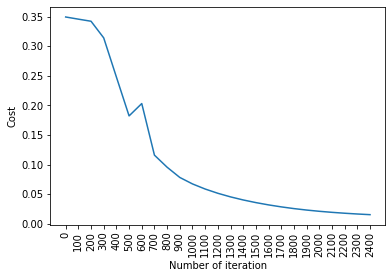

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [34]:
 def create_NN(x_train,y_train,x_test,y_test,num_iteration):
        cost_list = []
        cost_list2=[]
        index=[]
        
        parameters = initialize_parameters_and_layer_size_NN(x_train,y_train)
        
        for i in range(0, num_iteration):
            A2,cache = forward_propagation(x_train,parameters)
            cost=compute_cost_NN(A2,y_train,parameters)
            grads = backward_propagation_NN(parameters, cache, x_train, y_train)
            parameters= update(parameters,grads)
            
            
    
            if i % 100 == 0:
             cost_list2.append(cost)
             index.append(i)
             print("Cost after iteration %i :%f" %(i,cost))
        plt.plot(index,cost_list2)
        plt.xticks(index,rotation='vertical')
        plt.xlabel("Number of iteration")
        plt.ylabel("Cost")
        plt.show()
        
        y_prediction_test = prediction_NN(parameters,x_test)
        y_prediction_train = prediction_NN(parameters,x_train)

        
        print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
        return parameters
parameters = create_NN(x_train, y_train,x_test,y_test, num_iteration=2500)
            
            
        
        

Aşamaları hazırlanan ANN için belirlenen hyperparameter ile neural network oluşturulmuştur.Cost değerleri listeye eklenmiştir.
İterayonlar için cost değerleri yazdırılmış ve plot ettirilmiştir.Train ve test accuracy değerleri ayrı olarak yazdırılmıştır.